# Libraries 

In [28]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

# Images 

In [29]:
image = cv2.imread('Luffy_real.png',0)
image_ = image.copy()
template = cv2.imread('Luffy_template.png',0)

In [30]:
width, height = template.shape[::-1]

# Comparison methods

In [31]:
methods = [
    "cv2.TM_CCOEFF", 
    "cv2.TM_CCOEFF_NORMED",
    "cv2.TM_CCORR", 
    "cv2.TM_CCORR_NORMED", 
    "cv2.TM_SQDIFF", 
    "cv2.TM_SQDIFF_NORMED"
]

# Loop

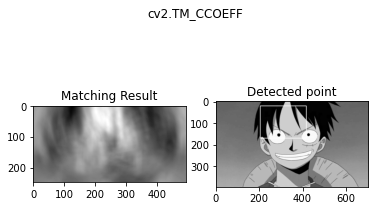

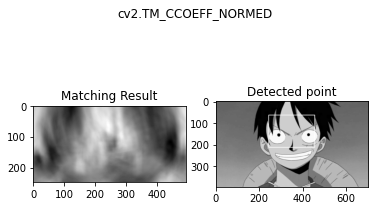

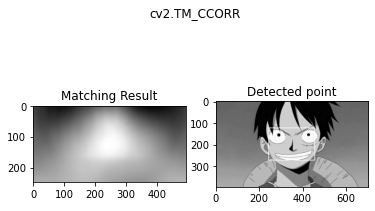

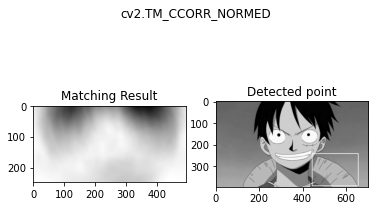

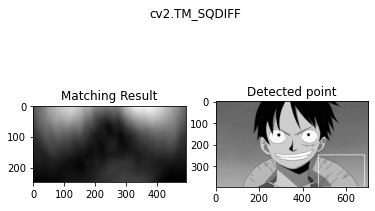

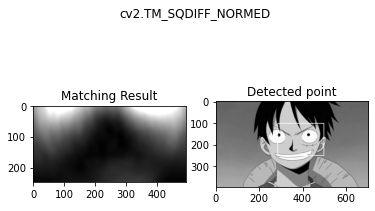

In [32]:
for meth in methods:
    
    image = image_.copy()
    method = eval(meth)
    
    #Template matching
    result = cv2.matchTemplate(image=image, templ=template, method=method)
    
    #Boders 
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    #If the method is TM_SQDIFF/Normed, take the minimum 
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    bottom_right = (top_left[0] + width, top_left[1]+ height)
    
    #Draw the rectangle 
    cv2.rectangle(image, top_left, bottom_right, 255, 2)
    
    #Plot the images 
    
    plt.subplot(121), plt.imshow(result, cmap="gray")
    plt.title("Matching Result")
    
    plt.subplot(122), plt.imshow(image, cmap="gray")
    plt.title("Detected point")
    plt.suptitle(meth)
    
    plt.show()
    

# Multiple objects

In [59]:
image = cv2.imread("Luffy_real.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

result = cv2.matchTemplate(image=image_gray, templ=template, method=cv2.TM_CCORR_NORMED)

In [60]:
threshold = 0.8

In [61]:
loc = np.where(result >= threshold)

In [62]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(image, pt, (pt[0] + width, pt[1] + height), (0,0,255), 2)
    
cv2.imwrite('Result.png', image)

True